In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
core_data = pd.read_csv('data/4/kepler_node_core_joules_total_2024-01-11 16:04:37.793667.csv')
dram_data = pd.read_csv('data/4/kepler_node_dram_joules_total_2024-01-11 16:05:08.232429.csv')
package_data = pd.read_csv('data/4/kepler_node_package_joules_total_2024-01-11 16:05:08.668301.csv')

In [14]:
default_start_time = '2024-01-11 09:34:22'
default_end_time = '2024-01-11 10:34:00'

peaks_start_time = '2024-01-11 08:18:24'
peaks_end_time = '2024-01-11 09:18:00'

nodes = ['10.242.64.8', '10.242.64.10']

In [17]:
def get_energy(start, end, data):
    energy = data[data['timestamp'] < end]
    energy = energy[energy['timestamp'] > start]
    if len(energy) == 0:
        return 0
    used_energy = 0
    for node in nodes:
        node_energy = energy[energy['instance'] == node]
        node_energy.reset_index(inplace=True, drop=True)
        used_energy += node_energy['value'][len(node_energy)-1] - node_energy['value'][0]
    return used_energy

In [18]:
core = get_energy(default_start_time, default_end_time, core_data)
dram = get_energy(default_start_time, default_end_time, dram_data)
package = get_energy(default_start_time, default_end_time, package_data)

total_default = core + dram + package
print(f'Core : {core}\nDram : {dram}\nPackage : {package}')
print(f'Total : {total_default}')

Core : 50207.43599999696
Dram : 2698.9169999998994
Package : 16735.81200000085
Total : 69642.16499999771


In [19]:
core = get_energy(peaks_start_time, peaks_end_time, core_data)
dram = get_energy(peaks_start_time, peaks_end_time, dram_data)
package = get_energy(peaks_start_time, peaks_end_time, package_data)

total_peaks = core + dram + package
print(f'Core : {core}\nDram : {dram}\nPackage : {package}')
print(f'Total : {total_peaks}')

Core : 58246.767000000924
Dram : 3130.9859999998007
Package : 19415.588999999687
Total : 80793.34200000041


In [20]:
percentage = (total_default - total_peaks)/total_default * 100
print(f'Percentage energy saving : {percentage}')

Percentage energy saving : -16.012105597238495


In [21]:
default_exps = int((pd.to_datetime(default_end_time) - pd.to_datetime(default_start_time))/pd.Timedelta(minutes=5)) + 2
peaks_exps = int((pd.to_datetime(peaks_end_time) - pd.to_datetime(peaks_start_time))/pd.Timedelta(minutes=5)) + 2

default_w = [str(pd.to_datetime(default_start_time) + i * pd.Timedelta(minutes=5)) for i in range(1, default_exps)]
peaks_w = [str(pd.to_datetime(peaks_start_time) + i * pd.Timedelta(minutes=5)) for i in range(1, peaks_exps)]

In [22]:
default_energy = []
peaks_energy = []

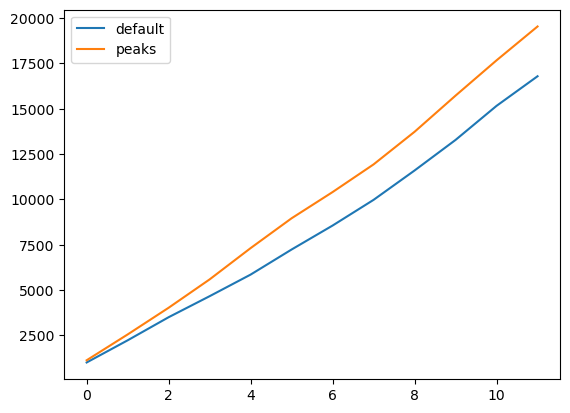

In [23]:
for time in default_w:
    core = get_energy(default_start_time, time, core_data)
    dram = get_energy(default_start_time, time, dram_data)
    package = get_energy(default_start_time, time, package_data)
#     default_energy.append(core + dram + package)
    default_energy.append(package)
for time in peaks_w:
    core = get_energy(peaks_start_time, time, core_data)
    dram = get_energy(peaks_start_time, time, dram_data)
    package = get_energy(peaks_start_time, time, package_data)
#     peaks_energy.append(core + dram + package)
    peaks_energy.append(package)
plt.plot(default_energy)
plt.plot(peaks_energy)
plt.legend(['default', 'peaks'])

In [24]:
default_energy

[1007.1299999998882,
 2228.68499999959,
 3503.588999999687,
 4662.618000000715,
 5853.83400000073,
 7237.407000000589,
 8559.042000001296,
 9975.933000000194,
 11595.756000000052,
 13281.561000000685,
 15160.03200000152,
 16792.248000001535]

In [25]:
peaks_energy

[1128.1890000002459,
 2552.3940000003204,
 4025.007000000216,
 5588.56799999997,
 7314.120000001043,
 8959.73099999968,
 10405.29600000009,
 11931.797999999486,
 13730.180999999866,
 15724.931999999098,
 17670.597000001,
 19537.253999999724]

In [12]:
container_energy_usage = pd.read_csv('data/2/kepler_container_joules_total_2023-12-31 18:01:41.832782.csv')
container_cpu_usage = pd.read_csv('data/2/container_cpu_usage_seconds_total_2023-12-31 18:01:30.319442.csv')

/var/folders/42/cvcgsrbd5fgbmc436n0pvpxm0000gn/T/ipykernel_30839/186202586.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  container_cpu_usage = pd.read_csv('data/2/container_cpu_usage_seconds_total_2023-12-31 18:01:30.319442.csv')


In [13]:
def get_usage_number(metric, start, end, metric_name):
    peaks = metric[metric[metric_name] == 'trimaran']
    peaks = peaks[peaks['timestamp'] < end]
    peaks = peaks[peaks['timestamp'] > start]
    peaks.reset_index(inplace=True, drop=True)
    print(peaks['value'][len(peaks)-1] - peaks['value'][0])

In [14]:
get_usage_number(container_energy_usage, default_start_time, default_end_time, 'container_name')
get_usage_number(container_energy_usage, peaks_start_time, peaks_end_time, 'container_name')

1.146000000000015
0.7379999999999427


In [15]:
get_usage_number(container_cpu_usage, default_start_time, default_end_time, 'container')
get_usage_number(container_cpu_usage, peaks_start_time, peaks_end_time, 'container')

6.2867600659999425
4.790072625999983
